## This notebook can be used to rank a list of nodes from a category that connect to an entity such as a gene. 
#### Example 1: Which disease are associate with NPM1 gene?
#### Example 2: Which proteins interacts with protein NPM1?
#### Example 3: Which drugs or small molecules can interact with NPM1?


In [1]:
import sys
sys.path.append('../src')
import TCT as TCT
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Step1: List all the APIs in the translator system
APInames = TCT.list_Translator_APIs()
print(len(APInames))
print(APInames.keys())

65
dict_keys(['Aragorn(Trapi v1.4.0)', 'ARAX Translator Reasoner - TRAPI 1.4.0', 'RTX KG2 - TRAPI 1.4.0', 'SPOKE KP for TRAPI 1.4', 'Multiomics BigGIM-DrugResponse KP API', 'Multiomics ClinicalTrials KP', 'Multiomics Wellness KP API', 'Multiomics EHR Risk KP API', 'Biothings Explorer (BTE)', 'Service Provider TRAPI', 'Explanatory-agent', 'MolePro', 'Genetics KP', 'medikanren-unsecret', 'Text Mined Cooccurrence API', 'OpenPredict API', 'Agrkb(Trapi v1.4.0)', 'Automat-biolink(Trapi v1.4.0)', 'Automat-cam-kp(Trapi v1.4.0)', 'Automat-drug-central(Trapi v1.4.0)', 'Automat-gtex(Trapi v1.4.0)', 'Automat-gtopdb(Trapi v1.4.0)', 'Automat-gwas-catalog(Trapi v1.4.0)', 'Automat-hetio(Trapi v1.4.0)', 'Automat-hgnc(Trapi v1.4.0)', 'Automat-hmdb(Trapi v1.4.0)', 'Automat-human-goa(Trapi v1.4.0)', 'Automat-icees-kg(Trapi v1.4.0)', 'Automat-intact(Trapi v1.4.0)', 'Automat-panther(Trapi v1.4.0)', 'Automat-pharos(Trapi v1.4.0)', 'Automat-robokop(Trapi v1.4.0)', 'Automat-sri-reference-kp(Trapi v1.4.0)', 'Au

In [3]:
# Step 2: Get metaKG and all predicates from Translator APIs
#metaKG = TCT.get_KP_metadata(APInames) # This only applies to the Translator APIs
#print(metaKG.columns)
#print(metaKG.shape)

#metaKG.to_csv('../metaData/metaKG.csv', index=False)
metaKG = pd.read_csv('../metaData/metaKG.csv')
All_predicates = list(set(metaKG['KG_category']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))

In [4]:
# Step 3: set input parameters
# Test multiomics BigGIM Drug Response KP
# Node1 for query
input_node1 = 'NPM1'
input_node1_id = TCT.get_curie(input_node1)
print(input_node1_id)
input_node1_list = [input_node1_id]
input_node1_category = ['biolink:Gene'] # Node: this has to be in a format of biolink:xxx

#Node2 for query
input_node2_list = []
#input_node2_category = ['biolink:Drug', 'biolink:SmallMolecule', 'biolink:ChemicalSubstance']
input_node2_category = ['biolink:Gene']

# Get all predicates for the input node1 and node2, user can furter select the predicates among this list
sele_predicates = list(set(TCT.select_concept(sub_list=input_node1_category,
                                              obj_list=input_node2_category,
                                              metaKG=metaKG)))
print("all relevant predicates in Translator:")
print(sele_predicates)
# select predicates

# Get all APIs for the input node1 and node2, user can furter select the APIs among this list
sele_APIs = TCT.select_API(sub_list=input_node1_category,
                           obj_list=input_node2_category,
                           metaKG=metaKG)

print("all relevant APIs in Translator:")
print(sele_APIs)
print(len(sele_APIs))

# get API URLs
API_URLs = TCT.get_Translator_API_URL(sele_APIs, 
                                      APInames)

NCBIGene:4869
all relevant predicates in Translator:
['biolink:binds', 'biolink:contributes_to', 'biolink:related_to', 'biolink:positively_correlated_with', 'biolink:part_of', 'biolink:genetic_association', 'biolink:subclass_of', 'biolink:homologous_to', 'biolink:has_input', 'biolink:produces', 'biolink:affects', 'biolink:biomarker_for', 'biolink:produced_by', 'biolink:regulates', 'biolink:affected_by', 'biolink:derives_from', 'biolink:genetically_associated_with', 'biolink:negatively_correlated_with', 'biolink:coexists_with', 'biolink:has_phenotype', 'biolink:causes', 'biolink:correlated_with', 'biolink:directly_physically_interacts_with', 'biolink:genetically_interacts_with', 'biolink:physically_interacts_with', 'biolink:coexpressed_with', 'biolink:orthologous_to', 'biolink:has_part', 'biolink:derives_into', 'biolink:regulated_by', 'biolink:close_match', 'biolink:interacts_with']
all relevant APIs in Translator:
['Automat-cam-kp(Trapi v1.4.0)', 'PharmGKB REST API', 'Service Provider 

Warning Code:404:https://api.bte.ncats.io/v1/bde72db681ec0b8f9eeb67bb6b8dd72c/query
Warning Code:404:https://automat.ci.transltr.io/ubergraph-nonredundant/1.4/query
Warning Code:400:https://ars-prod.transltr.io/ara-robokop/api/runquery
Warning Code:404:https://automat.ci.transltr.io/sri-reference-kp/1.4/queryWarning Code:404:https://automat.renci.org/biolink/1.4/query

Success!https://automat.ci.transltr.io/cam-kp/1.4/query?limit=100
Success!https://automat.ci.transltr.io/ubergraph/1.4/query
Success!https://automat.renci.org/hmdb/1.4/query
Success!https://automat.transltr.io/genome-alliance/1.4/query
Success!https://automat.renci.org/panther/1.4/query
Success!https://automat.renci.org/gtex/1.4/querySuccess!https://automat.renci.org/gwas-catalog/1.4/queryWarning Code:400:https://translator.broadinstitute.org/molepro/trapi/v1.4/asyncquery


Success!https://automat.renci.org/hgnc/1.4/querySuccess!https://automat.renci.org/pharos/1.4/query

Success!https://automat.renci.org/gtopdb/1.4/quer

<AxesSubplot:title={'center':'Ranking of one-hop nodes by predicate'}, ylabel='Predicate'>

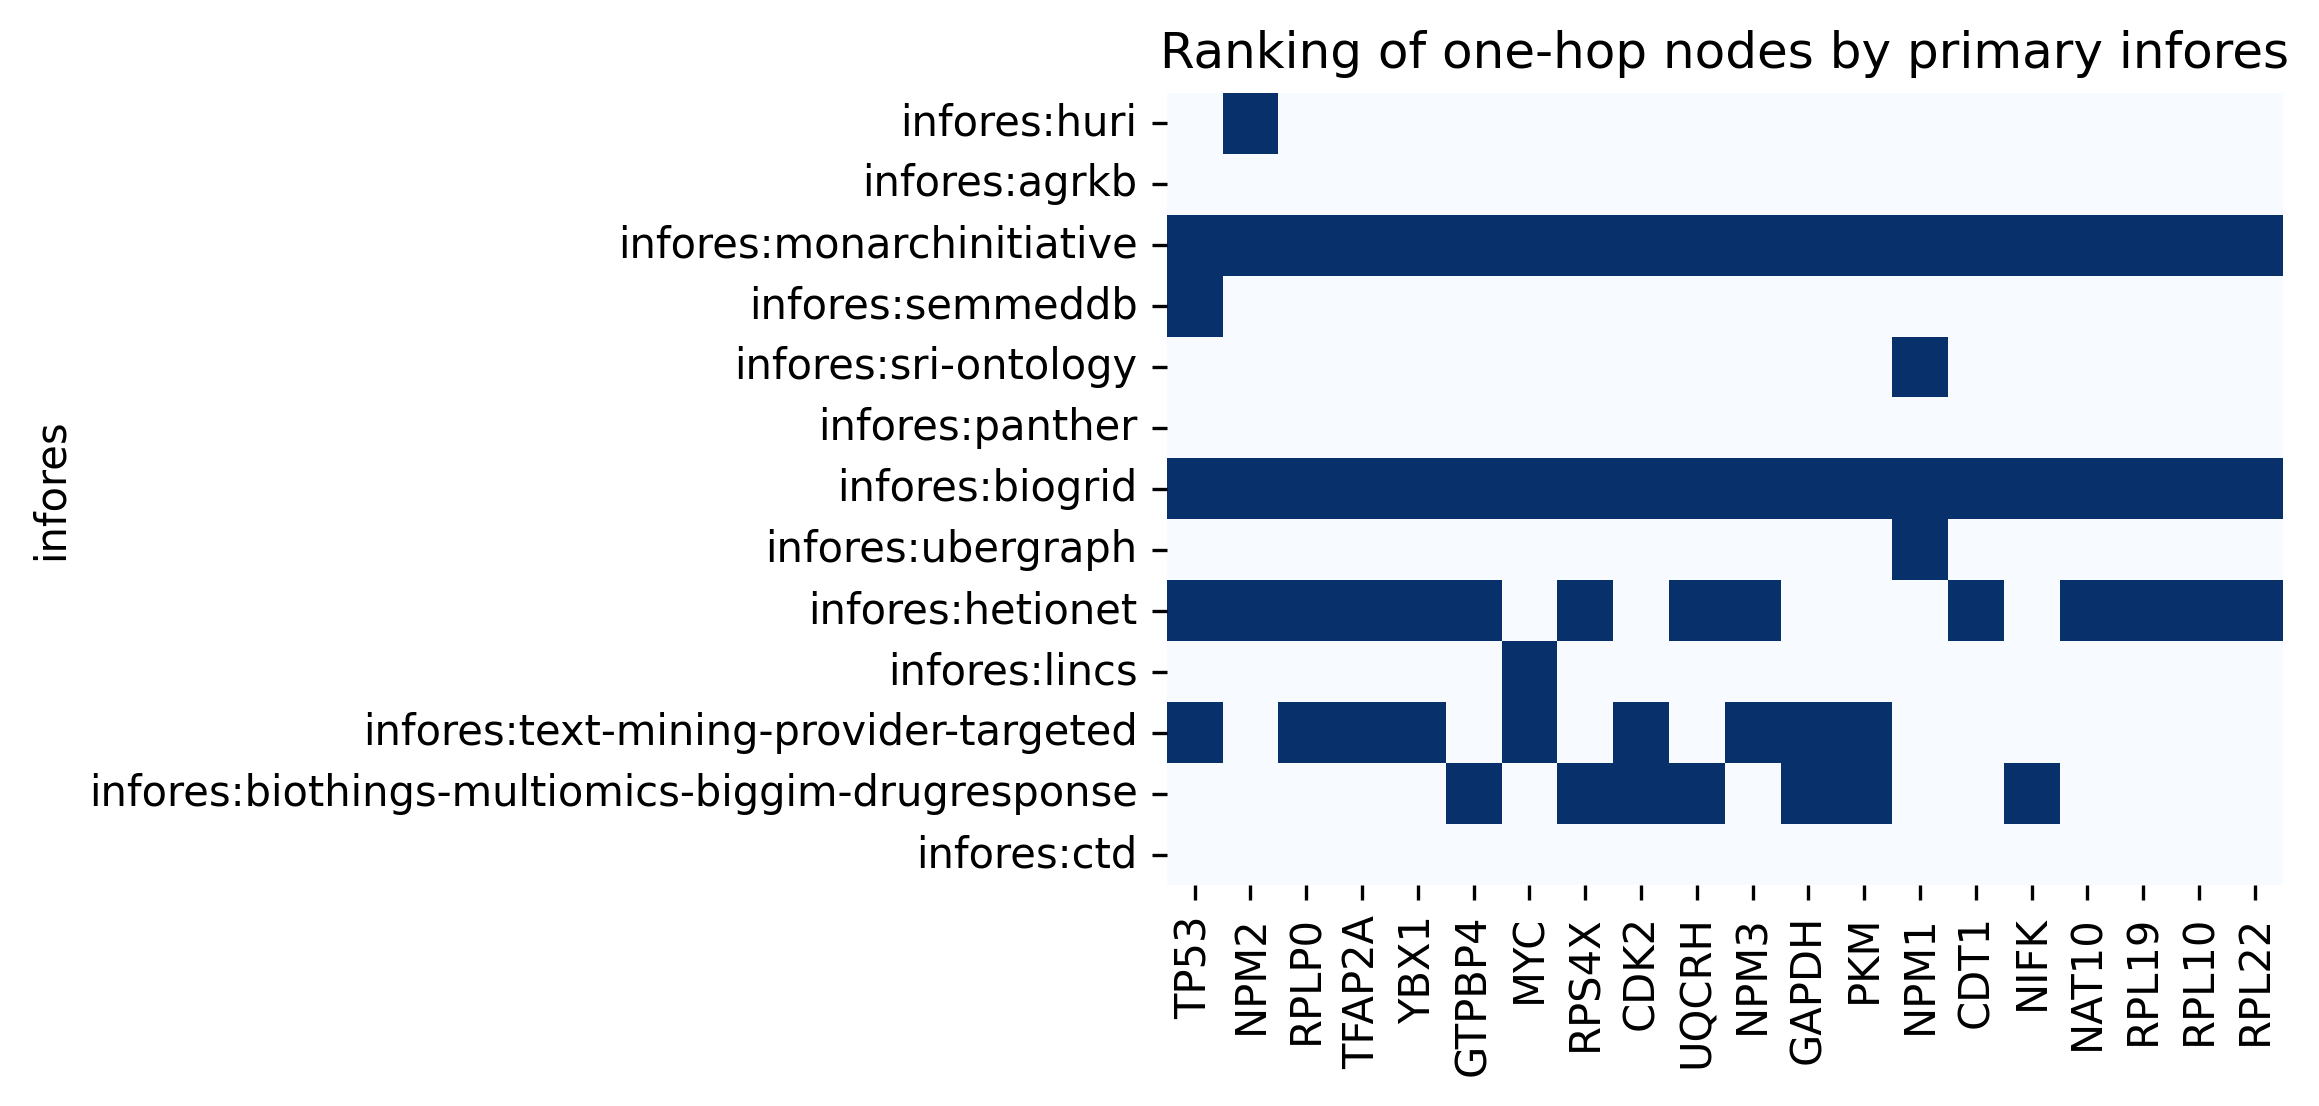

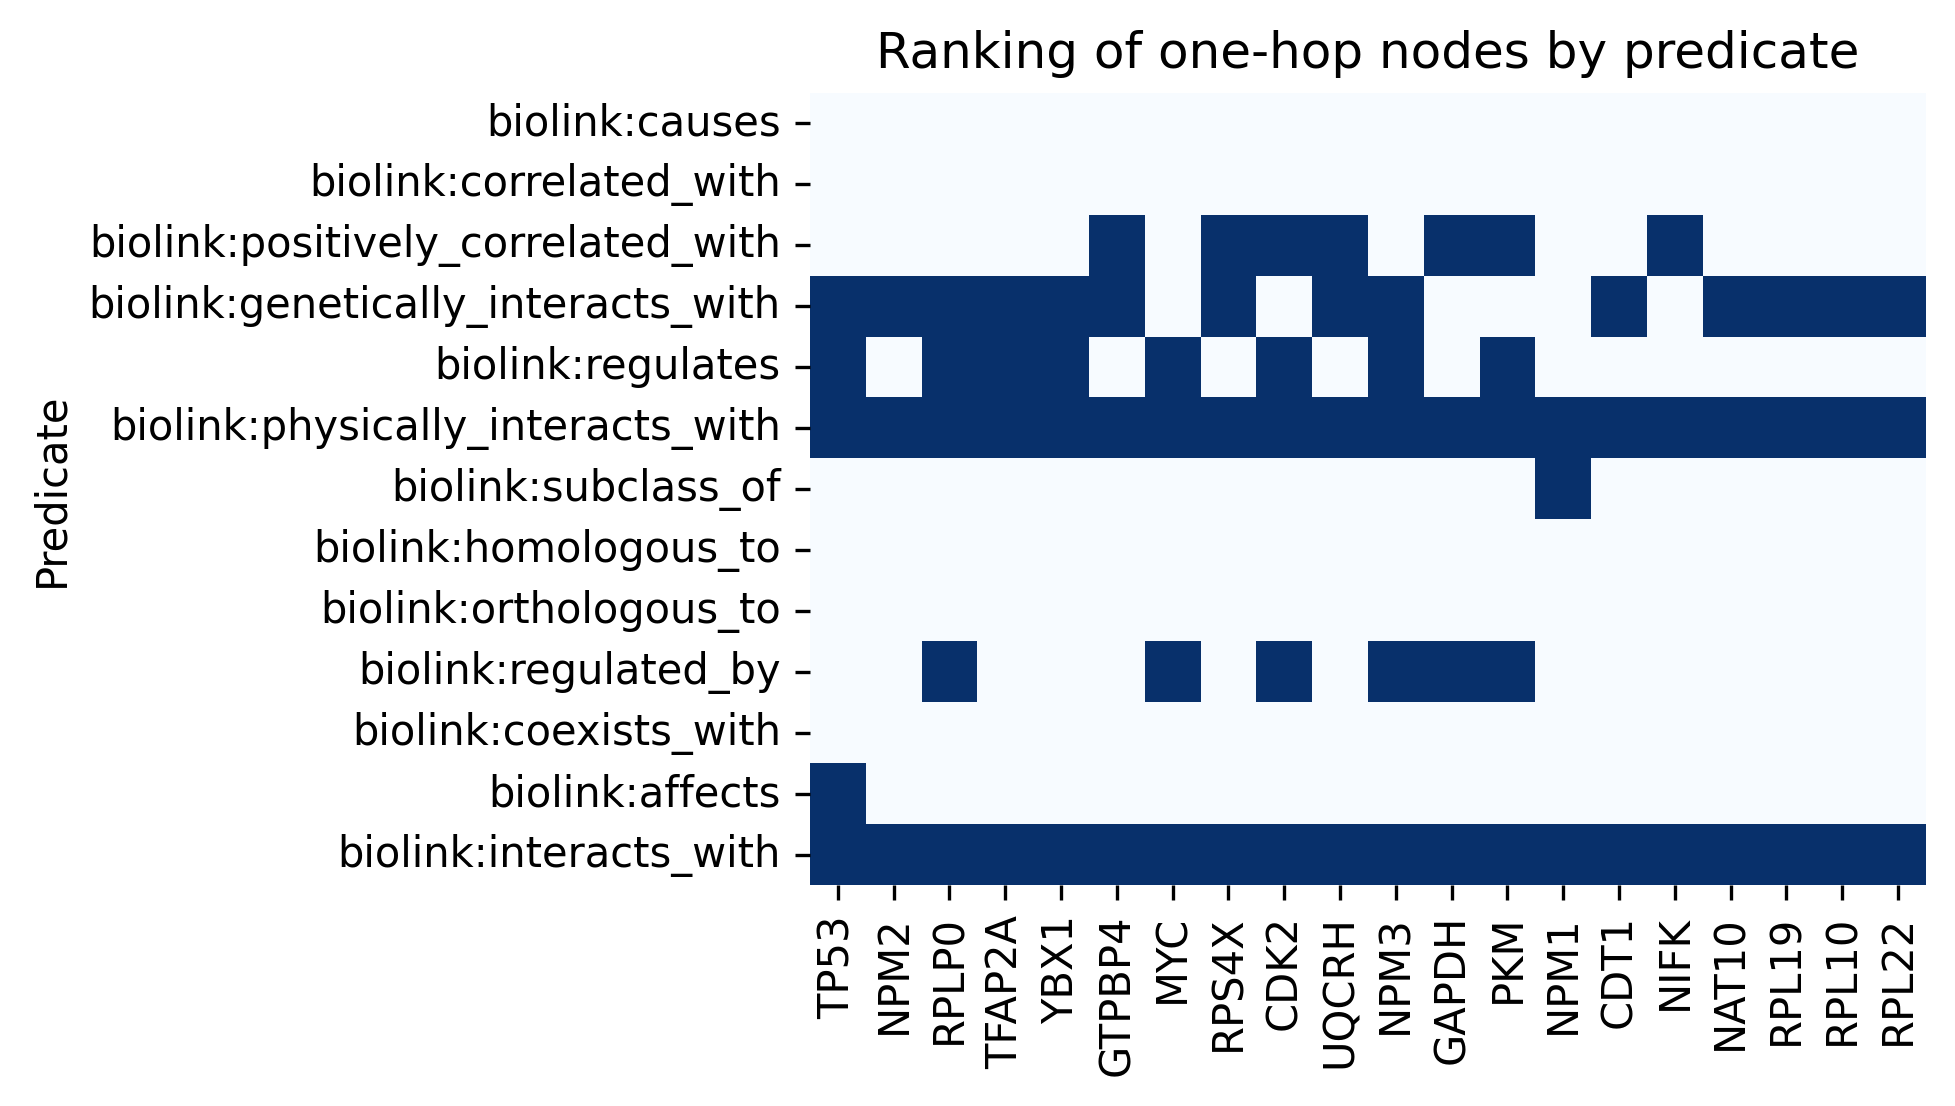

In [5]:
# Step 4: Format query json
query_json = TCT.format_query_json(input_node1_list,  # a list of identifiers for input node1
                                   input_node2_list,  # it can be empty list if only want to query node1
                                   input_node1_category,  # a list of categories of input node1
                                   input_node2_category,  # a list of categories of input node2
                                   sele_predicates) # a list of predicates

# Step 5: Query Translator APIs and parse results
result = TCT.parallel_api_query(API_URLs,query_json=query_json, max_workers=len(API_URLs))

# Step 6: Parse results
result_parsed = TCT.parse_KG(result)

# Step 7: Ranking the results. This ranking method is based on the number of unique primary infores. It can only be used to rank the results with one defined node.
result_ranked_by_primary_infores = TCT.rank_by_primary_infores(result_parsed, input_node1_id)   # input_node1_id is the curie id of the input node, such as "NCBIGene:1017"

# Step 8: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, result_parsed, num_of_nodes = 20, input_query = input_node1_id)

In [6]:
# End of the example